# Data Split

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
df = pd.read_excel('타율예측.xlsx')
df.head()

,#,팀명,경기,타석,타율,BABIP,볼넷%,삼진%,볼/삼,ISO,...,HBP,삼진,희플,희타,병살,도루,도실,승률,승차,후반기 타율
0,1,SK,113,4401,0.266,0.306,8.4,17.2,0.49,0.123,...,74,756,31,52,69,91,0,0.661,0.000,0.249
1,2,Hero,115,4508,0.285,0.328,9.0,16.7,0.54,0.137,...,53,753,43,71,90,86,0,0.600,0.061,0.269
2,3,두산,112,4390,0.273,0.308,10.4,14.8,0.70,0.116,...,56,648,68,94,99,70,0,0.589,0.072,0.292
3,4,LG,111,4277,0.266,0.310,8.0,17.0,0.47,0.107,...,54,726,38,79,90,79,0,0.545,0.116,0.270
4,5,NC,111,4365,0.278,0.313,8.3,16.0,0.52,0.138,...,64,700,45,86,102,61,0,0.491,0.170,0.280


In [92]:
df.values[0,:]

array([1, 'SK', 113, 4401, 0.266, 0.306, 8.4, 17.2, 0.49, 0.123, 42.43,
       0.727, 530.8, 4.73, 492.58, 6.09, 18.49, 0.329, -72.89, 3904, 1037,
       753, 179, 13, 92, 542, 518, 369, 17, 74, 756, 31, 52, 69, 91, 0,
       0.661, 0.249], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48380 missing from current

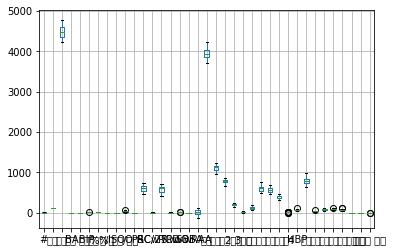

In [93]:
df.boxplot()

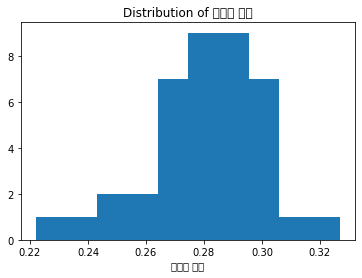

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['후반기 타율'])
plt.xlabel('후반기 타율')
plt.title('Distribution of 후반기 타율')

plt.show()

In [95]:
df.corr()

,#,경기,타석,타율,BABIP,볼넷%,삼진%,볼/삼,ISO,타수/홈런,...,고4,HBP,삼진,희플,희타,병살,도루,도실,승률,후반기 타율
#,1.000000,-0.118452,-0.367801,-0.501320,-0.358876,-0.302757,0.313980,-0.345537,-0.300274,0.220821,...,-0.148193,-0.342486,0.173959,-0.440195,-0.008349,-0.010309,-0.104070,NaN,-0.960616,-0.211325
경기,-0.118452,1.000000,0.772430,0.150229,0.202637,-0.305588,0.214844,-0.299571,0.224688,-0.257419,...,0.228754,0.397382,0.485930,-0.045028,-0.136053,0.100965,0.029259,NaN,0.085283,0.302539
타석,-0.367801,0.772430,1.000000,0.625923,0.569325,0.062660,-0.124405,0.103410,0.430457,-0.464563,...,0.242909,0.449044,0.233324,0.220411,0.181110,0.145193,0.050391,NaN,0.353310,0.498112
타율,-0.501320,0.150229,0.625923,1.000000,0.858069,0.146629,-0.409226,0.291876,0.533085,-0.530218,...,0.068000,0.210703,-0.177843,0.347051,0.367759,0.293060,-0.046829,NaN,0.493428,0.513061
BABIP,-0.358876,0.202637,0.569325,0.858069,1.000000,0.026633,-0.079640,0.033238,0.252880,-0.287621,...,0.152319,0.065152,0.128742,0.179054,0.182657,0.242761,0.112963,NaN,0.316721,0.361905
볼넷%,-0.302757,-0.305588,0.062660,0.146629,0.026633,1.000000,-0.474921,0.889017,-0.084205,0.165912,...,-0.102159,-0.189507,-0.440195,0.468307,0.190561,-0.013260,0.362100,NaN,0.345585,0.121404
삼진%,0.313980,0.214844,-0.124405,-0.409226,-0.079640,-0.474921,1.000000,-0.813305,0.108883,-0.148301,...,0.163659,0.059662,0.934993,-0.636244,-0.584722,-0.292708,-0.002895,NaN,-0.357663,-0.294560
볼/삼,-0.345537,-0.299571,0.103410,0.291876,0.033238,0.889017,-0.813305,1.000000,-0.092785,0.166835,...,-0.152141,-0.153437,-0.759469,0.644523,0.410572,0.146227,0.216313,NaN,0.406029,0.232432
ISO,-0.300274,0.224688,0.430457,0.533085,0.252880,-0.084205,0.108883,-0.092785,1.000000,-0.943620,...,0.108218,0.490878,0.253362,-0.075303,0.000035,0.009727,-0.278447,NaN,0.305509,0.347618
타수/홈런,0.220821,-0.257419,-0.464563,-0.530218,-0.287621,0.165912,-0.148301,0.166835,-0.943620,1.000000,...,-0.106848,-0.509872,-0.304252,0.185671,-0.036205,-0.065307,0.198444,NaN,-0.231154,-0.353505


In [96]:
del df['팀명']; del df['도실'];

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48380 missing from current

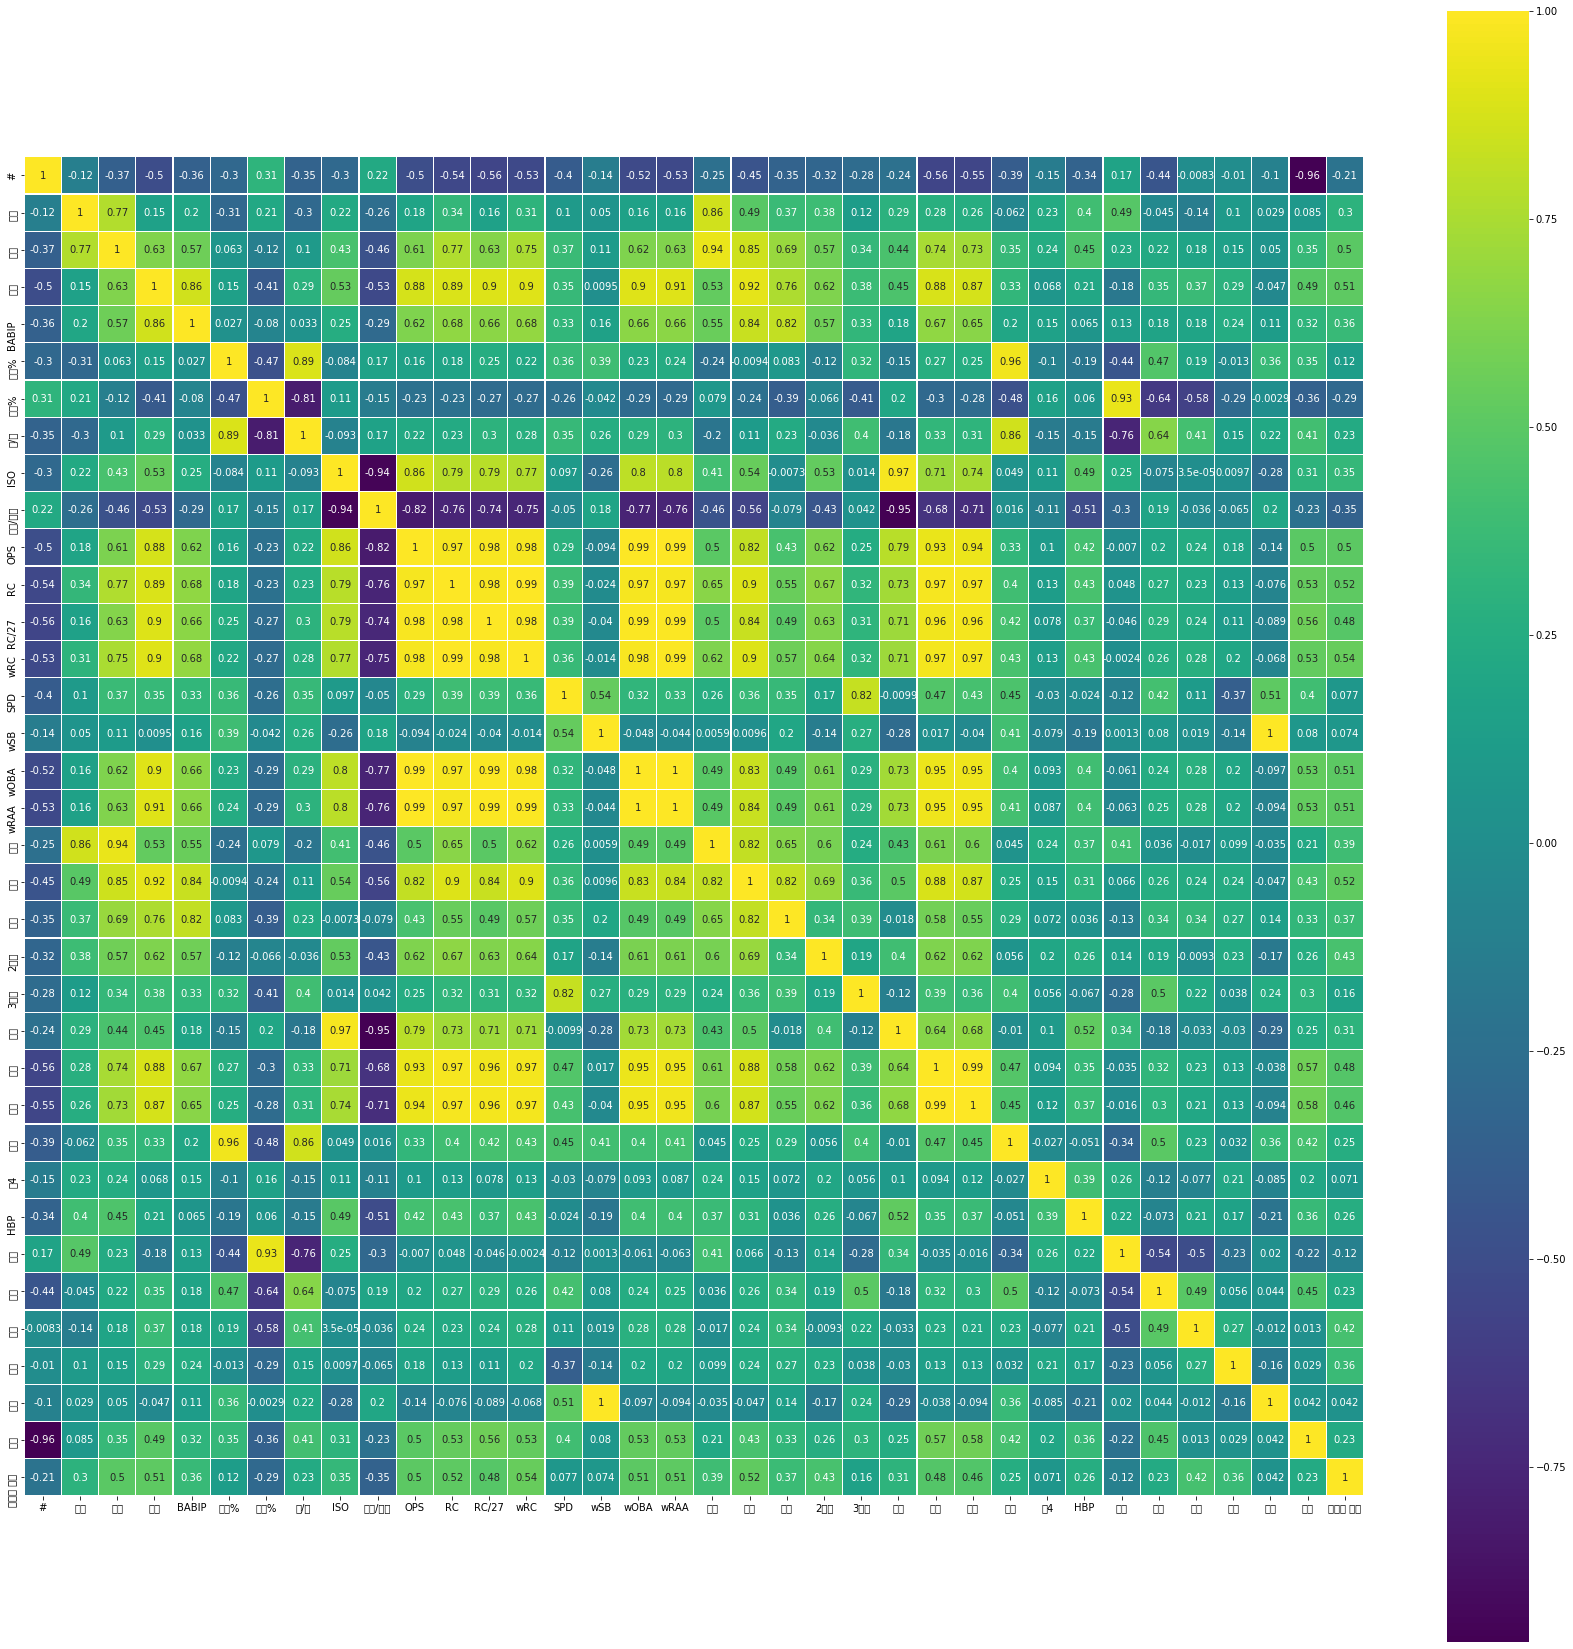

In [97]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), linewidths=0.01, square=True,cmap=plt.cm.viridis, linecolor='white', annot=True)

In [98]:
df.corr()['후반기 타율']

#        -0.211325
경기        0.302539
타석        0.498112
타율        0.513061
BABIP     0.361905
볼넷%       0.121404
삼진%      -0.294560
볼/삼       0.232432
ISO       0.347618
타수/홈런    -0.353505
OPS       0.502752
RC        0.515918
RC/27     0.480261
wRC       0.541944
SPD       0.076890
wSB       0.074388
wOBA      0.509029
wRAA      0.510760
타수        0.394163
안타        0.520265
단타        0.372872
2루타       0.430453
3루타       0.163357
홈런        0.305685
득점        0.475686
타점        0.464581
볼넷        0.254942
고4        0.070858
HBP       0.261361
삼진       -0.117126
희플        0.230939
희타        0.423403
병살        0.364861
도루        0.042265
승률        0.231463
후반기 타율    1.000000
Name: 후반기 타율, dtype: float64

In [101]:
R,C=df.shape

36

In [10]:
x_data = df.values[:, 0:C-1]
x_data.shape

(40, 34)

In [11]:
y_data = df.values[:, [C-1]]
y_data

array([[0.249],
       [0.269],
       [0.292],
       [0.27 ],
       [0.28 ],
       [0.275],
       [0.252],
       [0.237],
       [0.222],
       [0.261],
       [0.315],
       [0.274],
       [0.276],
       [0.269],
       [0.269],
       [0.288],
       [0.288],
       [0.285],
       [0.278],
       [0.278],
       [0.301],
       [0.282],
       [0.327],
       [0.3  ],
       [0.273],
       [0.26 ],
       [0.287],
       [0.275],
       [0.29 ],
       [0.301],
       [0.299],
       [0.288],
       [0.292],
       [0.296],
       [0.266],
       [0.284],
       [0.303],
       [0.294],
       [0.301],
       [0.287]])

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
x_data = scaler.fit_transform(x_data)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 34), (36, 1), (4, 34), (4, 1))

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[ 2.36275427e-02  2.26026908e-03  7.72638806e+00  4.23627234e-01
   1.98961083e-01  8.02271532e-02 -5.01177206e-02 -5.89052917e-02
   7.25794539e-01  2.73062651e-02 -7.33051212e-01 -9.26291995e-01
   6.94420536e-01 -3.85255938e+01 -7.10376564e-02 -1.15444592e+01
  -5.52237437e-01  3.02071104e+01 -6.57200852e-01  1.59018522e+00
   1.17254224e+00  4.69867738e-01  2.70405504e-01  1.51006348e+00
   4.83676099e-02  2.44091648e-03  1.36162956e+00 -1.04654558e-01
   6.16237032e-01 -1.10138087e-01 -9.32913615e-02  8.65557311e-02
  -1.64128721e-02  1.13463323e+01]]
절편: [0.28136263]
훈련 정확도:0.97737
테스트 정확도:-20.58689


In [16]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(34,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 0s 3ms/sample - loss: 0.0617 - mean_absolute_error: 0.1970 - val_loss: 0.0067 - val_mean_absolute_error: 0.0687
Epoch 2/100
36/36 [==============================] - 0s 830us/sample - loss: 0.0447 - mean_absolute_error: 0.1673 - val_loss: 0.0175 - val_mean_absolute_error: 0.1136
Epoch 3/100
36/36 [==============================] - 0s 803us/sample - loss: 0.0254 - mean_absolute_error: 0.1278 - val_loss: 0.0104 - val_mean_absolute_error: 0.0905
Epoch 4/100
36/36 [==============================] - 0s 776us/sample - loss: 0.0131 - mean_absolute_error: 0.0921 - val_loss: 0.0049 - val_mean_absolute_error: 0.0567
Epoch 5/100
36/36 [==============================] - 0s 803us/sample - loss: 0.0139 - mean_absolute_error: 0.0906 - val_loss: 0.0108 - val_mean_absolute_error: 0.0871
Epoch 

36/36 [==============================] - 0s 749us/sample - loss: 3.1555e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0012 - val_mean_absolute_error: 0.0275
Epoch 95/100
36/36 [==============================] - 0s 775us/sample - loss: 9.3886e-05 - mean_absolute_error: 0.0071 - val_loss: 0.0014 - val_mean_absolute_error: 0.0296
Epoch 96/100
36/36 [==============================] - 0s 720us/sample - loss: 9.2583e-05 - mean_absolute_error: 0.0077 - val_loss: 9.6082e-04 - val_mean_absolute_error: 0.0261
Epoch 97/100
36/36 [==============================] - 0s 720us/sample - loss: 1.6936e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0018 - val_mean_absolute_error: 0.0367
Epoch 98/100
36/36 [==============================] - 0s 748us/sample - loss: 1.8754e-04 - mean_absolute_error: 0.0080 - val_loss: 0.0012 - val_mean_absolute_error: 0.0276
Epoch 99/100
36/36 [==============================] - 0s 748us/sample - loss: 1.0711e-04 - mean_absolute_error: 0.0083 - val_loss: 8.6374e-04 - val_m

In [17]:
import numpy as np

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

In [19]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[34]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
    return model

In [20]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [21]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 0s 1ms/sample - loss: 0.8231 - mean_absolute_error: 0.7688 - val_loss: 0.1909 - val_mean_absolute_error: 0.3505
Epoch 2/100
36/36 [==============================] - 0s 83us/sample - loss: 0.7158 - mean_absolute_error: 0.7079 - val_loss: 0.2216 - val_mean_absolute_error: 0.3977
Epoch 3/100
36/36 [==============================] - 0s 110us/sample - loss: 0.6204 - mean_absolute_error: 0.6479 - val_loss: 0.2297 - val_mean_absolute_error: 0.4065
Epoch 4/100
36/36 [==============================] - 0s 110us/sample - loss: 0.5730 - mean_absolute_error: 0.6171 - val_loss: 0.2629 - val_mean_absolute_error: 0.4454
Epoch 5/100
36/36 [==============================] - 0s 112us/sample - loss: 0.5128 - mean_absolute_error: 0.5705 - val_loss: 0.2785 - val_mean_absolute_error: 0.4608
Epoch 6/100
36/36 [==============================] - 0s 111us/sample - loss: 0.4491 - mean_absolute_error: 0.5364 - val_loss:

In [22]:
mse_test = keras_reg.score(X_test, y_test)

4/4 [==============================] - 0s 0s/sample - loss: 0.3277 - mean_absolute_error: 0.5115


In [67]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3,4,5],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15 ....
Train on 24 samples, validate on 4 samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1118 - mean_absolute_error: 0.2883 - val_loss: 0.1826 - val_mean_absolute_error: 0.3940
Epoch 2/100
24/24 [==============================] - 0s 125us/sample - loss: 0.1102 - mean_absolute_error: 0.2858 - val_loss: 0.1806 - val_mean_absolute_error: 0.3917
Epoch 3/100
24/24 [==============================] - 0s 84us/sample - loss: 0.1087 - mean_absolute_error: 0.2835 - val_loss: 0.1786 - val_mean_absolute_error: 0.3894
Epoch 4/100
24/24 [==============================] - 0s 82us/sample - loss: 0.1072 - mean_absolute_error: 0.2814 - val_loss: 0.1767 - val_mean_absolute_error: 0.3872
Epoch 5/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1058 - mean_absolute_error: 0.2793 - val_loss: 0.1748 - val_mean_absolute_error: 0.3849
Epoch 6/100
24/24 [==============================] - 0s 82us/sample - loss: 0.1044 - mean_absolute_error: 0.2772 - val_loss: 0.1730 - val_mean_absolute_error: 0.3827
Epoc

Epoch 51/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0631 - mean_absolute_error: 0.2158 - val_loss: 0.1131 - val_mean_absolute_error: 0.3033
Epoch 52/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0626 - mean_absolute_error: 0.2148 - val_loss: 0.1122 - val_mean_absolute_error: 0.3019
Epoch 53/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0620 - mean_absolute_error: 0.2138 - val_loss: 0.1113 - val_mean_absolute_error: 0.3005
Epoch 54/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0614 - mean_absolute_error: 0.2128 - val_loss: 0.1103 - val_mean_absolute_error: 0.2991
Epoch 55/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0609 - mean_absolute_error: 0.2119 - val_loss: 0.1095 - val_mean_absolute_error: 0.2978
Epoch 56/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0603 - mean_absolute_error: 0.2109 - val_loss: 0.1086 - val_mean_absolute_error: 0.2

Epoch 100/100
12/12 [==============================] - 0s 80us/sample - loss: 0.0277 - mean_absolute_error: 0.1376
[CV]  learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15, total=   0.7s
[CV] learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15 ....
Train on 24 samples, validate on 4 samples


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Epoch 1/100
24/24 [==============================] - 0s 3ms/sample - loss: 0.0874 - mean_absolute_error: 0.2770 - val_loss: 0.0400 - val_mean_absolute_error: 0.1935
Epoch 2/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0848 - mean_absolute_error: 0.2727 - val_loss: 0.0391 - val_mean_absolute_error: 0.1908
Epoch 3/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0823 - mean_absolute_error: 0.2686 - val_loss: 0.0381 - val_mean_absolute_error: 0.1883
Epoch 4/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0799 - mean_absolute_error: 0.2646 - val_loss: 0.0372 - val_mean_absolute_error: 0.1858
Epoch 5/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0775 - mean_absolute_error: 0.2606 - val_loss: 0.0364 - val_mean_absolute_error: 0.1833
Epoch 6/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0753 - mean_absolute_error: 0.2567 - val_loss: 0.0355 - val_mean_absolute_error: 0.1808
Epoc

Epoch 51/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0288 - mean_absolute_error: 0.1504 - val_loss: 0.0152 - val_mean_absolute_error: 0.1081
Epoch 52/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0284 - mean_absolute_error: 0.1491 - val_loss: 0.0150 - val_mean_absolute_error: 0.1077
Epoch 53/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0280 - mean_absolute_error: 0.1478 - val_loss: 0.0148 - val_mean_absolute_error: 0.1072
Epoch 54/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0276 - mean_absolute_error: 0.1466 - val_loss: 0.0146 - val_mean_absolute_error: 0.1068
Epoch 55/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0273 - mean_absolute_error: 0.1454 - val_loss: 0.0144 - val_mean_absolute_error: 0.1064
Epoch 56/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0269 - mean_absolute_error: 0.1442 - val_loss: 0.0142 - val_mean_absolute_error: 0.106

Epoch 100/100
12/12 [==============================] - 0s 0s/sample - loss: 0.0236 - mean_absolute_error: 0.1341
[CV]  learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15, total=   0.7s
[CV] learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15 ....
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 3ms/sample - loss: 0.0388 - mean_absolute_error: 0.1696 - val_loss: 0.0650 - val_mean_absolute_error: 0.2406
Epoch 2/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0385 - mean_absolute_error: 0.1690 - val_loss: 0.0646 - val_mean_absolute_error: 0.2398
Epoch 3/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0382 - mean_absolute_error: 0.1684 - val_loss: 0.0642 - val_mean_absolute_error: 0.2390
Epoch 4/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0380 - mean_absolute_error: 0.1678 - val_loss: 0.0638 - val_mean_absolute_error: 0.2381
Epoch 5/100
24/24 [=======

Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0288 - mean_absolute_error: 0.1467 - val_loss: 0.0502 - val_mean_absolute_error: 0.2086
Epoch 49/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0287 - mean_absolute_error: 0.1464 - val_loss: 0.0499 - val_mean_absolute_error: 0.2081
Epoch 50/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0286 - mean_absolute_error: 0.1461 - val_loss: 0.0497 - val_mean_absolute_error: 0.2076
Epoch 51/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0284 - mean_absolute_error: 0.1457 - val_loss: 0.0495 - val_mean_absolute_error: 0.2070
Epoch 52/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0283 - mean_absolute_error: 0.1454 - val_loss: 0.0493 - val_mean_absolute_error: 0.2065
Epoch 53/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0282 - mean_absolute_error: 0.1451 - val_loss: 0.0490 - val_mean_absolute_error: 0.206

Epoch 98/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0236 - mean_absolute_error: 0.1324 - val_loss: 0.0414 - val_mean_absolute_error: 0.1867
Epoch 99/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0235 - mean_absolute_error: 0.1322 - val_loss: 0.0412 - val_mean_absolute_error: 0.1863
Epoch 100/100
12/12 [==============================] - 0s 81us/sample - loss: 0.0417 - mean_absolute_error: 0.1819
[CV]  learning_rate=0.001683454924600351, n_hidden=4, n_neurons=15, total=   0.7s
[CV] learning_rate=0.008731907739399206, n_hidden=4, n_neurons=21 ....
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 3ms/sample - loss: 0.0839 - mean_absolute_error: 0.2380 - val_loss: 0.0644 - val_mean_absolute_error: 0.2491
Epoch 2/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0785 - mean_absolute_error: 0.2315 - val_loss: 0.0620 - val_mean_absolute_error: 0.2446
Epoch 3/100
24/24 [=====

Epoch 46/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0157 - mean_absolute_error: 0.1056 - val_loss: 0.0170 - val_mean_absolute_error: 0.1286
Epoch 47/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0154 - mean_absolute_error: 0.1044 - val_loss: 0.0167 - val_mean_absolute_error: 0.1274
Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0150 - mean_absolute_error: 0.1032 - val_loss: 0.0164 - val_mean_absolute_error: 0.1263
Epoch 49/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0147 - mean_absolute_error: 0.1021 - val_loss: 0.0161 - val_mean_absolute_error: 0.1252
Epoch 50/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0144 - mean_absolute_error: 0.1010 - val_loss: 0.0158 - val_mean_absolute_error: 0.1241
Epoch 51/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0141 - mean_absolute_error: 0.0999 - val_loss: 0.0156 - val_mean_absolute_error: 0.12

Epoch 95/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0076 - mean_absolute_error: 0.0687 - val_loss: 0.0092 - val_mean_absolute_error: 0.0942
Epoch 96/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0075 - mean_absolute_error: 0.0682 - val_loss: 0.0091 - val_mean_absolute_error: 0.0938
Epoch 97/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0075 - mean_absolute_error: 0.0678 - val_loss: 0.0090 - val_mean_absolute_error: 0.0935
Epoch 98/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0074 - mean_absolute_error: 0.0673 - val_loss: 0.0090 - val_mean_absolute_error: 0.0931
Epoch 99/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0073 - mean_absolute_error: 0.0669 - val_loss: 0.0089 - val_mean_absolute_error: 0.0928
Epoch 100/100
12/12 [==============================] - 0s 0s/sample - loss: 0.0256 - mean_absolute_error: 0.1288
[CV]  learning_rate=0.008731907739399206, n_hidden

Epoch 43/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0102 - mean_absolute_error: 0.0821 - val_loss: 0.0074 - val_mean_absolute_error: 0.0744
Epoch 44/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0101 - mean_absolute_error: 0.0815 - val_loss: 0.0073 - val_mean_absolute_error: 0.0739
Epoch 45/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0099 - mean_absolute_error: 0.0809 - val_loss: 0.0073 - val_mean_absolute_error: 0.0734
Epoch 46/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0098 - mean_absolute_error: 0.0804 - val_loss: 0.0072 - val_mean_absolute_error: 0.0730
Epoch 47/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0097 - mean_absolute_error: 0.0799 - val_loss: 0.0071 - val_mean_absolute_error: 0.0725
Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0095 - mean_absolute_error: 0.0793 - val_loss: 0.0071 - val_mean_absolute_error: 0.07

Epoch 92/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0063 - mean_absolute_error: 0.0630 - val_loss: 0.0058 - val_mean_absolute_error: 0.0677
Epoch 93/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0063 - mean_absolute_error: 0.0627 - val_loss: 0.0058 - val_mean_absolute_error: 0.0677
Epoch 94/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0062 - mean_absolute_error: 0.0624 - val_loss: 0.0058 - val_mean_absolute_error: 0.0677
Epoch 95/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0062 - mean_absolute_error: 0.0622 - val_loss: 0.0058 - val_mean_absolute_error: 0.0676
Epoch 96/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0061 - mean_absolute_error: 0.0619 - val_loss: 0.0058 - val_mean_absolute_error: 0.0676
Epoch 97/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0061 - mean_absolute_error: 0.0616 - val_loss: 0.0057 - val_mean_absolute_error: 0.06

Epoch 21/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1397 - mean_absolute_error: 0.2998 - val_loss: 0.0752 - val_mean_absolute_error: 0.2325
Epoch 22/100
12/12 [==============================] - 0s 83us/sample - loss: 0.1498 - mean_absolute_error: 0.3053
[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=   0.4s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 5ms/sample - loss: 0.1818 - mean_absolute_error: 0.3626 - val_loss: 0.1853 - val_mean_absolute_error: 0.3911
Epoch 2/100
24/24 [==============================] - 0s 126us/sample - loss: 0.1775 - mean_absolute_error: 0.3585 - val_loss: 0.1824 - val_mean_absolute_error: 0.3876
Epoch 3/100
24/24 [==============================] - 0s 82us/sample - loss: 0.1734 - mean_absolute_error: 0.3547 - val_loss: 0.1796 - val_mean_absolute_error: 0.3843
Epoch 4/100
24/24 [=====

Epoch 47/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0787 - mean_absolute_error: 0.2371 - val_loss: 0.1090 - val_mean_absolute_error: 0.2899
Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0777 - mean_absolute_error: 0.2355 - val_loss: 0.1082 - val_mean_absolute_error: 0.2887
Epoch 49/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0767 - mean_absolute_error: 0.2340 - val_loss: 0.1074 - val_mean_absolute_error: 0.2874
Epoch 50/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0758 - mean_absolute_error: 0.2325 - val_loss: 0.1066 - val_mean_absolute_error: 0.2862
Epoch 51/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0748 - mean_absolute_error: 0.2310 - val_loss: 0.1058 - val_mean_absolute_error: 0.2851
Epoch 52/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0739 - mean_absolute_error: 0.2296 - val_loss: 0.1050 - val_mean_absolute_error: 0.28

Epoch 97/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0491 - mean_absolute_error: 0.1831 - val_loss: 0.0845 - val_mean_absolute_error: 0.2523
Epoch 98/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0488 - mean_absolute_error: 0.1823 - val_loss: 0.0843 - val_mean_absolute_error: 0.2519
Epoch 99/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0485 - mean_absolute_error: 0.1816 - val_loss: 0.0840 - val_mean_absolute_error: 0.2515
Epoch 100/100
12/12 [==============================] - 0s 81us/sample - loss: 0.0739 - mean_absolute_error: 0.2333
[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=   0.7s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 5ms/sample - loss: 0.1576 - mean_absolute_error: 0.3202 - val_loss: 0.0861 - val_mean_absolute_error: 0.2396
Epoch 2/100
24/24 [==

Epoch 45/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0707 - mean_absolute_error: 0.2128 - val_loss: 0.0439 - val_mean_absolute_error: 0.1837
Epoch 46/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0697 - mean_absolute_error: 0.2111 - val_loss: 0.0434 - val_mean_absolute_error: 0.1828
Epoch 47/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0688 - mean_absolute_error: 0.2095 - val_loss: 0.0428 - val_mean_absolute_error: 0.1819
Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0679 - mean_absolute_error: 0.2078 - val_loss: 0.0424 - val_mean_absolute_error: 0.1810
Epoch 49/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0669 - mean_absolute_error: 0.2062 - val_loss: 0.0419 - val_mean_absolute_error: 0.1802
Epoch 50/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0661 - mean_absolute_error: 0.2047 - val_loss: 0.0414 - val_mean_absolute_error: 0.17

Epoch 94/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0422 - mean_absolute_error: 0.1606 - val_loss: 0.0282 - val_mean_absolute_error: 0.1516
Epoch 95/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0419 - mean_absolute_error: 0.1600 - val_loss: 0.0280 - val_mean_absolute_error: 0.1512
Epoch 96/100
24/24 [==============================] - 0s 85us/sample - loss: 0.0416 - mean_absolute_error: 0.1593 - val_loss: 0.0278 - val_mean_absolute_error: 0.1507
Epoch 97/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0413 - mean_absolute_error: 0.1587 - val_loss: 0.0276 - val_mean_absolute_error: 0.1503
Epoch 98/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0410 - mean_absolute_error: 0.1581 - val_loss: 0.0275 - val_mean_absolute_error: 0.1498
Epoch 99/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0407 - mean_absolute_error: 0.1575 - val_loss: 0.0273 - val_mean_absolute_error: 0.14

Epoch 42/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2717 - mean_absolute_error: 0.4943 - val_loss: 0.2508 - val_mean_absolute_error: 0.4959
Epoch 43/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2693 - mean_absolute_error: 0.4920 - val_loss: 0.2490 - val_mean_absolute_error: 0.4941
Epoch 44/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2668 - mean_absolute_error: 0.4897 - val_loss: 0.2472 - val_mean_absolute_error: 0.4923
Epoch 45/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2644 - mean_absolute_error: 0.4873 - val_loss: 0.2454 - val_mean_absolute_error: 0.4905
Epoch 46/100
24/24 [==============================] - 0s 84us/sample - loss: 0.2619 - mean_absolute_error: 0.4850 - val_loss: 0.2436 - val_mean_absolute_error: 0.4888
Epoch 47/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2595 - mean_absolute_error: 0.4827 - val_loss: 0.2419 - val_mean_absolute_error: 0.

Epoch 91/100
24/24 [==============================] - 0s 84us/sample - loss: 0.1769 - mean_absolute_error: 0.3952 - val_loss: 0.1788 - val_mean_absolute_error: 0.4188
Epoch 92/100
24/24 [==============================] - 0s 124us/sample - loss: 0.1754 - mean_absolute_error: 0.3935 - val_loss: 0.1777 - val_mean_absolute_error: 0.4175
Epoch 93/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1739 - mean_absolute_error: 0.3917 - val_loss: 0.1765 - val_mean_absolute_error: 0.4161
Epoch 94/100
24/24 [==============================] - 0s 125us/sample - loss: 0.1725 - mean_absolute_error: 0.3900 - val_loss: 0.1753 - val_mean_absolute_error: 0.4147
Epoch 95/100
24/24 [==============================] - 0s 125us/sample - loss: 0.1710 - mean_absolute_error: 0.3883 - val_loss: 0.1742 - val_mean_absolute_error: 0.4134
Epoch 96/100
24/24 [==============================] - 0s 82us/sample - loss: 0.1696 - mean_absolute_error: 0.3865 - val_loss: 0.1730 - val_mean_absolute_error: 0.

Epoch 39/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0862 - mean_absolute_error: 0.2697 - val_loss: 0.0584 - val_mean_absolute_error: 0.2158
Epoch 40/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0852 - mean_absolute_error: 0.2681 - val_loss: 0.0578 - val_mean_absolute_error: 0.2148
Epoch 41/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0843 - mean_absolute_error: 0.2665 - val_loss: 0.0572 - val_mean_absolute_error: 0.2137
Epoch 42/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0834 - mean_absolute_error: 0.2650 - val_loss: 0.0567 - val_mean_absolute_error: 0.2126
Epoch 43/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0825 - mean_absolute_error: 0.2634 - val_loss: 0.0561 - val_mean_absolute_error: 0.2115
Epoch 44/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0816 - mean_absolute_error: 0.2619 - val_loss: 0.0556 - val_mean_absolute_error: 0.

Epoch 88/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0529 - mean_absolute_error: 0.2087 - val_loss: 0.0369 - val_mean_absolute_error: 0.1705
Epoch 89/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0524 - mean_absolute_error: 0.2077 - val_loss: 0.0366 - val_mean_absolute_error: 0.1697
Epoch 90/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0520 - mean_absolute_error: 0.2067 - val_loss: 0.0362 - val_mean_absolute_error: 0.1689
Epoch 91/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0515 - mean_absolute_error: 0.2057 - val_loss: 0.0359 - val_mean_absolute_error: 0.1682
Epoch 92/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0511 - mean_absolute_error: 0.2048 - val_loss: 0.0356 - val_mean_absolute_error: 0.1674
Epoch 93/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0507 - mean_absolute_error: 0.2038 - val_loss: 0.0353 - val_mean_absolute_error: 0.16

Epoch 36/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0457 - mean_absolute_error: 0.1578 - val_loss: 0.0041 - val_mean_absolute_error: 0.0455
Epoch 37/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0454 - mean_absolute_error: 0.1572 - val_loss: 0.0041 - val_mean_absolute_error: 0.0455
Epoch 38/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0451 - mean_absolute_error: 0.1567 - val_loss: 0.0041 - val_mean_absolute_error: 0.0455
Epoch 39/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0448 - mean_absolute_error: 0.1561 - val_loss: 0.0040 - val_mean_absolute_error: 0.0455
Epoch 40/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0445 - mean_absolute_error: 0.1556 - val_loss: 0.0040 - val_mean_absolute_error: 0.0454
Epoch 41/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0442 - mean_absolute_error: 0.1551 - val_loss: 0.0040 - val_mean_absolute_error: 0.

Epoch 85/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0342 - mean_absolute_error: 0.1373 - val_loss: 0.0034 - val_mean_absolute_error: 0.0500
Epoch 86/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0340 - mean_absolute_error: 0.1370 - val_loss: 0.0034 - val_mean_absolute_error: 0.0502
Epoch 87/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0338 - mean_absolute_error: 0.1366 - val_loss: 0.0034 - val_mean_absolute_error: 0.0504
Epoch 88/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0336 - mean_absolute_error: 0.1363 - val_loss: 0.0034 - val_mean_absolute_error: 0.0505
Epoch 89/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0335 - mean_absolute_error: 0.1360 - val_loss: 0.0034 - val_mean_absolute_error: 0.0507
Epoch 90/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0333 - mean_absolute_error: 0.1356 - val_loss: 0.0034 - val_mean_absolute_error: 0.05

Epoch 36/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0308 - mean_absolute_error: 0.1666 - val_loss: 0.0333 - val_mean_absolute_error: 0.1632
Epoch 37/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0303 - mean_absolute_error: 0.1655 - val_loss: 0.0327 - val_mean_absolute_error: 0.1616
Epoch 38/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0299 - mean_absolute_error: 0.1643 - val_loss: 0.0322 - val_mean_absolute_error: 0.1601
Epoch 39/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0295 - mean_absolute_error: 0.1632 - val_loss: 0.0317 - val_mean_absolute_error: 0.1585
Epoch 40/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0290 - mean_absolute_error: 0.1620 - val_loss: 0.0312 - val_mean_absolute_error: 0.1570
Epoch 41/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0286 - mean_absolute_error: 0.1609 - val_loss: 0.0307 - val_mean_absolute_error: 0.1

Epoch 85/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0164 - mean_absolute_error: 0.1214 - val_loss: 0.0166 - val_mean_absolute_error: 0.1160
Epoch 86/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0163 - mean_absolute_error: 0.1208 - val_loss: 0.0164 - val_mean_absolute_error: 0.1154
Epoch 87/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0161 - mean_absolute_error: 0.1201 - val_loss: 0.0162 - val_mean_absolute_error: 0.1148
Epoch 88/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0159 - mean_absolute_error: 0.1194 - val_loss: 0.0160 - val_mean_absolute_error: 0.1142
Epoch 89/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0157 - mean_absolute_error: 0.1187 - val_loss: 0.0158 - val_mean_absolute_error: 0.1136
Epoch 90/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0156 - mean_absolute_error: 0.1181 - val_loss: 0.0156 - val_mean_absolute_error: 0.1

Epoch 33/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0846 - mean_absolute_error: 0.2440 - val_loss: 0.1272 - val_mean_absolute_error: 0.2990
Epoch 34/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0810 - mean_absolute_error: 0.2385 - val_loss: 0.1229 - val_mean_absolute_error: 0.2935
Epoch 35/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0776 - mean_absolute_error: 0.2331 - val_loss: 0.1189 - val_mean_absolute_error: 0.2882
Epoch 36/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0745 - mean_absolute_error: 0.2280 - val_loss: 0.1150 - val_mean_absolute_error: 0.2831
Epoch 37/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0715 - mean_absolute_error: 0.2229 - val_loss: 0.1113 - val_mean_absolute_error: 0.2781
Epoch 38/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0687 - mean_absolute_error: 0.2181 - val_loss: 0.1078 - val_mean_absolute_error: 0

Epoch 82/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0172 - mean_absolute_error: 0.0958 - val_loss: 0.0372 - val_mean_absolute_error: 0.1463
Epoch 83/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0168 - mean_absolute_error: 0.0943 - val_loss: 0.0365 - val_mean_absolute_error: 0.1451
Epoch 84/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0164 - mean_absolute_error: 0.0930 - val_loss: 0.0358 - val_mean_absolute_error: 0.1439
Epoch 85/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0160 - mean_absolute_error: 0.0917 - val_loss: 0.0352 - val_mean_absolute_error: 0.1428
Epoch 86/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0156 - mean_absolute_error: 0.0905 - val_loss: 0.0346 - val_mean_absolute_error: 0.1416
Epoch 87/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0153 - mean_absolute_error: 0.0892 - val_loss: 0.0340 - val_mean_absolute_error: 

Epoch 30/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0531 - mean_absolute_error: 0.2232 - val_loss: 0.0406 - val_mean_absolute_error: 0.1994
Epoch 31/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0516 - mean_absolute_error: 0.2201 - val_loss: 0.0394 - val_mean_absolute_error: 0.1965
Epoch 32/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0503 - mean_absolute_error: 0.2170 - val_loss: 0.0383 - val_mean_absolute_error: 0.1936
Epoch 33/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0489 - mean_absolute_error: 0.2140 - val_loss: 0.0372 - val_mean_absolute_error: 0.1908
Epoch 34/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0476 - mean_absolute_error: 0.2111 - val_loss: 0.0362 - val_mean_absolute_error: 0.1880
Epoch 35/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0464 - mean_absolute_error: 0.2081 - val_loss: 0.0351 - val_mean_absolute_error: 0.18

Epoch 79/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0149 - mean_absolute_error: 0.1136 - val_loss: 0.0096 - val_mean_absolute_error: 0.0960
Epoch 80/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0146 - mean_absolute_error: 0.1121 - val_loss: 0.0093 - val_mean_absolute_error: 0.0945
Epoch 81/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0142 - mean_absolute_error: 0.1105 - val_loss: 0.0091 - val_mean_absolute_error: 0.0930
Epoch 82/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0139 - mean_absolute_error: 0.1090 - val_loss: 0.0088 - val_mean_absolute_error: 0.0916
Epoch 83/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0135 - mean_absolute_error: 0.1075 - val_loss: 0.0085 - val_mean_absolute_error: 0.0902
Epoch 84/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0132 - mean_absolute_error: 0.1061 - val_loss: 0.0083 - val_mean_absolute_error: 0.08

12/12 [==============================] - 0s 0s/sample - loss: 0.0158 - mean_absolute_error: 0.1070
[CV]  learning_rate=0.008339092654580042, n_hidden=5, n_neurons=38, total=   0.8s
[CV] learning_rate=0.008339092654580042, n_hidden=5, n_neurons=38 ....
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 9ms/sample - loss: 0.0435 - mean_absolute_error: 0.1981 - val_loss: 0.0430 - val_mean_absolute_error: 0.2017
Epoch 2/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0394 - mean_absolute_error: 0.1870 - val_loss: 0.0399 - val_mean_absolute_error: 0.1935
Epoch 3/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0358 - mean_absolute_error: 0.1766 - val_loss: 0.0370 - val_mean_absolute_error: 0.1857
Epoch 4/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0326 - mean_absolute_error: 0.1668 - val_loss: 0.0344 - val_mean_absolute_error: 0.1782
Epoch 5/100
24/24 [=====================

Epoch 49/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0069 - mean_absolute_error: 0.0708 - val_loss: 0.0089 - val_mean_absolute_error: 0.0811
Epoch 50/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0068 - mean_absolute_error: 0.0704 - val_loss: 0.0088 - val_mean_absolute_error: 0.0807
Epoch 51/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0067 - mean_absolute_error: 0.0700 - val_loss: 0.0087 - val_mean_absolute_error: 0.0804
Epoch 52/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0067 - mean_absolute_error: 0.0695 - val_loss: 0.0087 - val_mean_absolute_error: 0.0801
Epoch 53/100
24/24 [==============================] - 0s 165us/sample - loss: 0.0066 - mean_absolute_error: 0.0691 - val_loss: 0.0086 - val_mean_absolute_error: 0.0798
Epoch 54/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0065 - mean_absolute_error: 0.0687 - val_loss: 0.0085 - val_mean_absolute_error: 0.

Epoch 98/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0045 - mean_absolute_error: 0.0562 - val_loss: 0.0068 - val_mean_absolute_error: 0.0696
Epoch 99/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0045 - mean_absolute_error: 0.0560 - val_loss: 0.0068 - val_mean_absolute_error: 0.0695
Epoch 100/100
12/12 [==============================] - 0s 81us/sample - loss: 0.0084 - mean_absolute_error: 0.0762
[CV]  learning_rate=0.008339092654580042, n_hidden=5, n_neurons=38, total=   1.1s
[CV] learning_rate=0.008339092654580042, n_hidden=5, n_neurons=38 ....
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 9ms/sample - loss: 0.3222 - mean_absolute_error: 0.5552 - val_loss: 0.3033 - val_mean_absolute_error: 0.5344
Epoch 2/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2586 - mean_absolute_error: 0.4971 - val_loss: 0.2551 - val_mean_absolute_error: 0.4886
Epoch 3/100
24/24 [==

Epoch 46/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0055 - mean_absolute_error: 0.0632 - val_loss: 0.0142 - val_mean_absolute_error: 0.0933
Epoch 47/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0054 - mean_absolute_error: 0.0628 - val_loss: 0.0140 - val_mean_absolute_error: 0.0928
Epoch 48/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0053 - mean_absolute_error: 0.0624 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 49/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0052 - mean_absolute_error: 0.0620 - val_loss: 0.0136 - val_mean_absolute_error: 0.0918
Epoch 50/100
24/24 [==============================] - 0s 85us/sample - loss: 0.0051 - mean_absolute_error: 0.0616 - val_loss: 0.0135 - val_mean_absolute_error: 0.0913
Epoch 51/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0050 - mean_absolute_error: 0.0612 - val_loss: 0.0133 - val_mean_absolute_error: 0.

Epoch 95/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0029 - mean_absolute_error: 0.0472 - val_loss: 0.0102 - val_mean_absolute_error: 0.0785
Epoch 96/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0029 - mean_absolute_error: 0.0469 - val_loss: 0.0101 - val_mean_absolute_error: 0.0783
Epoch 97/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0029 - mean_absolute_error: 0.0467 - val_loss: 0.0101 - val_mean_absolute_error: 0.0782
Epoch 98/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0028 - mean_absolute_error: 0.0464 - val_loss: 0.0101 - val_mean_absolute_error: 0.0780
Epoch 99/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0028 - mean_absolute_error: 0.0462 - val_loss: 0.0100 - val_mean_absolute_error: 0.0778
Epoch 100/100
12/12 [==============================] - 0s 83us/sample - loss: 0.0027 - mean_absolute_error: 0.0392
[CV]  learning_rate=0.008339092654580042, n_hi

Epoch 43/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2329 - mean_absolute_error: 0.4132 - val_loss: 0.2248 - val_mean_absolute_error: 0.4216
Epoch 44/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2318 - mean_absolute_error: 0.4123 - val_loss: 0.2241 - val_mean_absolute_error: 0.4213
Epoch 45/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2306 - mean_absolute_error: 0.4114 - val_loss: 0.2234 - val_mean_absolute_error: 0.4209
Epoch 46/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2296 - mean_absolute_error: 0.4105 - val_loss: 0.2227 - val_mean_absolute_error: 0.4206
Epoch 47/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2285 - mean_absolute_error: 0.4096 - val_loss: 0.2219 - val_mean_absolute_error: 0.4203
Epoch 48/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2275 - mean_absolute_error: 0.4088 - val_loss: 0.2212 - val_mean_absolute_error: 0.

Epoch 92/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1887 - mean_absolute_error: 0.3743 - val_loss: 0.1958 - val_mean_absolute_error: 0.4065
Epoch 93/100
24/24 [==============================] - 0s 125us/sample - loss: 0.1880 - mean_absolute_error: 0.3736 - val_loss: 0.1954 - val_mean_absolute_error: 0.4062
Epoch 94/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1873 - mean_absolute_error: 0.3729 - val_loss: 0.1949 - val_mean_absolute_error: 0.4059
Epoch 95/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1865 - mean_absolute_error: 0.3722 - val_loss: 0.1944 - val_mean_absolute_error: 0.4056
Epoch 96/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1858 - mean_absolute_error: 0.3715 - val_loss: 0.1939 - val_mean_absolute_error: 0.4053
Epoch 97/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1851 - mean_absolute_error: 0.3708 - val_loss: 0.1934 - val_mean_absolute_error: 0.40

Epoch 27/100
24/24 [==============================] - 0s 125us/sample - loss: 0.4550 - mean_absolute_error: 0.6355 - val_loss: 0.3621 - val_mean_absolute_error: 0.5648
Epoch 28/100
24/24 [==============================] - 0s 81us/sample - loss: 0.4505 - mean_absolute_error: 0.6323 - val_loss: 0.3586 - val_mean_absolute_error: 0.5617
Epoch 29/100
24/24 [==============================] - 0s 126us/sample - loss: 0.4461 - mean_absolute_error: 0.6290 - val_loss: 0.3550 - val_mean_absolute_error: 0.5586
Epoch 30/100
24/24 [==============================] - 0s 124us/sample - loss: 0.4417 - mean_absolute_error: 0.6258 - val_loss: 0.3516 - val_mean_absolute_error: 0.5555
Epoch 31/100
24/24 [==============================] - 0s 84us/sample - loss: 0.4374 - mean_absolute_error: 0.6226 - val_loss: 0.3481 - val_mean_absolute_error: 0.5525
Epoch 32/100
24/24 [==============================] - 0s 125us/sample - loss: 0.4331 - mean_absolute_error: 0.6194 - val_loss: 0.3447 - val_mean_absolute_error: 0

Epoch 76/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2875 - mean_absolute_error: 0.4983 - val_loss: 0.2286 - val_mean_absolute_error: 0.4333
Epoch 77/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2849 - mean_absolute_error: 0.4959 - val_loss: 0.2266 - val_mean_absolute_error: 0.4310
Epoch 78/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2824 - mean_absolute_error: 0.4935 - val_loss: 0.2246 - val_mean_absolute_error: 0.4287
Epoch 79/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2799 - mean_absolute_error: 0.4912 - val_loss: 0.2226 - val_mean_absolute_error: 0.4265
Epoch 80/100
24/24 [==============================] - 0s 125us/sample - loss: 0.2775 - mean_absolute_error: 0.4888 - val_loss: 0.2207 - val_mean_absolute_error: 0.4242
Epoch 81/100
24/24 [==============================] - 0s 84us/sample - loss: 0.2751 - mean_absolute_error: 0.4865 - val_loss: 0.2187 - val_mean_absolute_error: 0

Epoch 24/100
24/24 [==============================] - 0s 123us/sample - loss: 0.1853 - mean_absolute_error: 0.3276 - val_loss: 0.3238 - val_mean_absolute_error: 0.4919
Epoch 25/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1798 - mean_absolute_error: 0.3218 - val_loss: 0.3183 - val_mean_absolute_error: 0.4877
Epoch 26/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1746 - mean_absolute_error: 0.3162 - val_loss: 0.3130 - val_mean_absolute_error: 0.4837
Epoch 27/100
24/24 [==============================] - 0s 125us/sample - loss: 0.1697 - mean_absolute_error: 0.3108 - val_loss: 0.3078 - val_mean_absolute_error: 0.4795
Epoch 28/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1650 - mean_absolute_error: 0.3057 - val_loss: 0.3030 - val_mean_absolute_error: 0.4758
Epoch 29/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1604 - mean_absolute_error: 0.3004 - val_loss: 0.2985 - val_mean_absolute_error: 0.4

Epoch 73/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0668 - mean_absolute_error: 0.1973 - val_loss: 0.2102 - val_mean_absolute_error: 0.3926
Epoch 74/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0658 - mean_absolute_error: 0.1958 - val_loss: 0.2094 - val_mean_absolute_error: 0.3918
Epoch 75/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0648 - mean_absolute_error: 0.1943 - val_loss: 0.2086 - val_mean_absolute_error: 0.3910
Epoch 76/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0637 - mean_absolute_error: 0.1928 - val_loss: 0.2078 - val_mean_absolute_error: 0.3901
Epoch 77/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0627 - mean_absolute_error: 0.1913 - val_loss: 0.2070 - val_mean_absolute_error: 0.3894
Epoch 78/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0618 - mean_absolute_error: 0.1899 - val_loss: 0.2062 - val_mean_absolute_error: 0.

Epoch 8/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2380 - mean_absolute_error: 0.4449 - val_loss: 0.2260 - val_mean_absolute_error: 0.4647
Epoch 9/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2257 - mean_absolute_error: 0.4340 - val_loss: 0.2159 - val_mean_absolute_error: 0.4525
Epoch 10/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2146 - mean_absolute_error: 0.4238 - val_loss: 0.2070 - val_mean_absolute_error: 0.4412
Epoch 11/100
24/24 [==============================] - 0s 83us/sample - loss: 0.2047 - mean_absolute_error: 0.4141 - val_loss: 0.1989 - val_mean_absolute_error: 0.4307
Epoch 12/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1956 - mean_absolute_error: 0.4049 - val_loss: 0.1916 - val_mean_absolute_error: 0.4210
Epoch 13/100
24/24 [==============================] - 0s 83us/sample - loss: 0.1873 - mean_absolute_error: 0.3963 - val_loss: 0.1849 - val_mean_absolute_error: 0.4120


Epoch 57/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0578 - mean_absolute_error: 0.2143 - val_loss: 0.0893 - val_mean_absolute_error: 0.2387
Epoch 58/100
24/24 [==============================] - 0s 85us/sample - loss: 0.0567 - mean_absolute_error: 0.2122 - val_loss: 0.0887 - val_mean_absolute_error: 0.2386
Epoch 59/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0557 - mean_absolute_error: 0.2102 - val_loss: 0.0881 - val_mean_absolute_error: 0.2386
Epoch 60/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0546 - mean_absolute_error: 0.2081 - val_loss: 0.0876 - val_mean_absolute_error: 0.2385
Epoch 61/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0536 - mean_absolute_error: 0.2061 - val_loss: 0.0871 - val_mean_absolute_error: 0.2384
Epoch 62/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0526 - mean_absolute_error: 0.2041 - val_loss: 0.0866 - val_mean_absolute_error: 0.

Epoch 5/100
24/24 [==============================] - 0s 84us/sample - loss: 2.5991 - mean_absolute_error: 1.3327 - val_loss: 1.3210 - val_mean_absolute_error: 0.8863
Epoch 6/100
24/24 [==============================] - 0s 85us/sample - loss: 2.5773 - mean_absolute_error: 1.3255 - val_loss: 1.3163 - val_mean_absolute_error: 0.8859
Epoch 7/100
24/24 [==============================] - 0s 82us/sample - loss: 2.5558 - mean_absolute_error: 1.3185 - val_loss: 1.3117 - val_mean_absolute_error: 0.8854
Epoch 8/100
24/24 [==============================] - 0s 83us/sample - loss: 2.5347 - mean_absolute_error: 1.3115 - val_loss: 1.3072 - val_mean_absolute_error: 0.8849
Epoch 9/100
24/24 [==============================] - 0s 82us/sample - loss: 2.5138 - mean_absolute_error: 1.3045 - val_loss: 1.3026 - val_mean_absolute_error: 0.8844
Epoch 10/100
24/24 [==============================] - 0s 84us/sample - loss: 2.4933 - mean_absolute_error: 1.2977 - val_loss: 1.2981 - val_mean_absolute_error: 0.8839
Epo

Epoch 55/100
24/24 [==============================] - 0s 84us/sample - loss: 1.8096 - mean_absolute_error: 1.0649 - val_loss: 1.1254 - val_mean_absolute_error: 0.8501
Epoch 56/100
24/24 [==============================] - 0s 84us/sample - loss: 1.7984 - mean_absolute_error: 1.0607 - val_loss: 1.1220 - val_mean_absolute_error: 0.8491
Epoch 57/100
24/24 [==============================] - 0s 83us/sample - loss: 1.7875 - mean_absolute_error: 1.0565 - val_loss: 1.1187 - val_mean_absolute_error: 0.8482
Epoch 58/100
24/24 [==============================] - 0s 83us/sample - loss: 1.7766 - mean_absolute_error: 1.0523 - val_loss: 1.1153 - val_mean_absolute_error: 0.8472
Epoch 59/100
24/24 [==============================] - 0s 82us/sample - loss: 1.7659 - mean_absolute_error: 1.0482 - val_loss: 1.1120 - val_mean_absolute_error: 0.8463
Epoch 60/100
24/24 [==============================] - 0s 81us/sample - loss: 1.7553 - mean_absolute_error: 1.0442 - val_loss: 1.1087 - val_mean_absolute_error: 0.845

Epoch 3/100
24/24 [==============================] - 0s 83us/sample - loss: 0.6205 - mean_absolute_error: 0.6096 - val_loss: 0.9284 - val_mean_absolute_error: 0.8413
Epoch 4/100
24/24 [==============================] - 0s 82us/sample - loss: 0.6159 - mean_absolute_error: 0.6065 - val_loss: 0.9245 - val_mean_absolute_error: 0.8397
Epoch 5/100
24/24 [==============================] - 0s 83us/sample - loss: 0.6114 - mean_absolute_error: 0.6036 - val_loss: 0.9205 - val_mean_absolute_error: 0.8382
Epoch 6/100
24/24 [==============================] - 0s 82us/sample - loss: 0.6070 - mean_absolute_error: 0.6010 - val_loss: 0.9166 - val_mean_absolute_error: 0.8367
Epoch 7/100
24/24 [==============================] - 0s 125us/sample - loss: 0.6027 - mean_absolute_error: 0.5985 - val_loss: 0.9128 - val_mean_absolute_error: 0.8352
Epoch 8/100
24/24 [==============================] - 0s 83us/sample - loss: 0.5984 - mean_absolute_error: 0.5962 - val_loss: 0.9090 - val_mean_absolute_error: 0.8337
Epo

24/24 [==============================] - 0s 83us/sample - loss: 0.4567 - mean_absolute_error: 0.5252 - val_loss: 0.7693 - val_mean_absolute_error: 0.7755
Epoch 53/100
24/24 [==============================] - 0s 125us/sample - loss: 0.4543 - mean_absolute_error: 0.5240 - val_loss: 0.7667 - val_mean_absolute_error: 0.7743
Epoch 54/100
24/24 [==============================] - 0s 83us/sample - loss: 0.4519 - mean_absolute_error: 0.5229 - val_loss: 0.7640 - val_mean_absolute_error: 0.7732
Epoch 55/100
24/24 [==============================] - 0s 125us/sample - loss: 0.4496 - mean_absolute_error: 0.5217 - val_loss: 0.7615 - val_mean_absolute_error: 0.7720
Epoch 56/100
24/24 [==============================] - 0s 83us/sample - loss: 0.4473 - mean_absolute_error: 0.5206 - val_loss: 0.7589 - val_mean_absolute_error: 0.7709
Epoch 57/100
24/24 [==============================] - 0s 125us/sample - loss: 0.4450 - mean_absolute_error: 0.5194 - val_loss: 0.7563 - val_mean_absolute_error: 0.7697
Epoch 58

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   1.1s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 11ms/sample - loss: 1.6831 - mean_absolute_error: 1.0111 - val_loss: 0.8530 - val_mean_absolute_error: 0.8874
Epoch 2/100
24/24 [==============================] - 0s 83us/sample - loss: 1.6659 - mean_absolute_error: 1.0060 - val_loss: 0.8430 - val_mean_absolute_error: 0.8820
Epoch 3/100
24/24 [==============================] - 0s 83us/sample - loss: 1.6490 - mean_absolute_error: 1.0009 - val_loss: 0.8332 - val_mean_absolute_error: 0.8765
Epoch 4/100
24/24 [==============================] - 0s 83us/sample - loss: 1.6324 - mean_absolute_error: 0.9959 - val_loss: 0.8235 - val_mean_absolute_error: 0.8712
Epoch 5/100
24/24 [==============================] - 0s 83us/sample - loss: 1.6160 - mean_absolute_error: 0.9909 - val_loss: 0.8139 - val_m

Epoch 49/100
24/24 [==============================] - 0s 125us/sample - loss: 1.1028 - mean_absolute_error: 0.8056 - val_loss: 0.5066 - val_mean_absolute_error: 0.6706
Epoch 50/100
24/24 [==============================] - 0s 124us/sample - loss: 1.0947 - mean_absolute_error: 0.8021 - val_loss: 0.5016 - val_mean_absolute_error: 0.6669
Epoch 51/100
24/24 [==============================] - 0s 82us/sample - loss: 1.0867 - mean_absolute_error: 0.7990 - val_loss: 0.4967 - val_mean_absolute_error: 0.6633
Epoch 52/100
24/24 [==============================] - 0s 83us/sample - loss: 1.0789 - mean_absolute_error: 0.7959 - val_loss: 0.4919 - val_mean_absolute_error: 0.6597
Epoch 53/100
24/24 [==============================] - 0s 83us/sample - loss: 1.0711 - mean_absolute_error: 0.7928 - val_loss: 0.4871 - val_mean_absolute_error: 0.6561
Epoch 54/100
24/24 [==============================] - 0s 125us/sample - loss: 1.0635 - mean_absolute_error: 0.7897 - val_loss: 0.4825 - val_mean_absolute_error: 0.

Epoch 98/100
24/24 [==============================] - 0s 84us/sample - loss: 0.8136 - mean_absolute_error: 0.6860 - val_loss: 0.3288 - val_mean_absolute_error: 0.5221
Epoch 99/100
24/24 [==============================] - 0s 125us/sample - loss: 0.8094 - mean_absolute_error: 0.6843 - val_loss: 0.3262 - val_mean_absolute_error: 0.5196
Epoch 100/100
12/12 [==============================] - 0s 81us/sample - loss: 0.7095 - mean_absolute_error: 0.7404
[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   1.1s
[CV] learning_rate=0.0033625641252688094, n_hidden=1, n_neurons=92 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 0s 11ms/sample - loss: 0.3742 - mean_absolute_error: 0.4666 - val_loss: 0.2292 - val_mean_absolute_error: 0.3184
Epoch 2/100
24/24 [==============================] - 0s 83us/sample - loss: 0.3501 - mean_absolute_error: 0.4496 - val_loss: 0.2149 - val_mean_absolute_error: 0.3100
Epoch 3/100
24/24 [==

Epoch 46/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0505 - mean_absolute_error: 0.1685 - val_loss: 0.0576 - val_mean_absolute_error: 0.1904
Epoch 47/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0491 - mean_absolute_error: 0.1666 - val_loss: 0.0571 - val_mean_absolute_error: 0.1901
Epoch 48/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0477 - mean_absolute_error: 0.1648 - val_loss: 0.0566 - val_mean_absolute_error: 0.1898
Epoch 49/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0465 - mean_absolute_error: 0.1630 - val_loss: 0.0561 - val_mean_absolute_error: 0.1896
Epoch 50/100
24/24 [==============================] - 0s 85us/sample - loss: 0.0452 - mean_absolute_error: 0.1612 - val_loss: 0.0556 - val_mean_absolute_error: 0.1893
Epoch 51/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0440 - mean_absolute_error: 0.1595 - val_loss: 0.0552 - val_mean_absolute_error: 0

Epoch 95/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0191 - mean_absolute_error: 0.1174 - val_loss: 0.0492 - val_mean_absolute_error: 0.1883
Epoch 96/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0188 - mean_absolute_error: 0.1167 - val_loss: 0.0491 - val_mean_absolute_error: 0.1884
Epoch 97/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0186 - mean_absolute_error: 0.1161 - val_loss: 0.0491 - val_mean_absolute_error: 0.1884
Epoch 98/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0183 - mean_absolute_error: 0.1154 - val_loss: 0.0491 - val_mean_absolute_error: 0.1884
Epoch 99/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0181 - mean_absolute_error: 0.1148 - val_loss: 0.0491 - val_mean_absolute_error: 0.1885
Epoch 100/100
12/12 [==============================] - 0s 0s/sample - loss: 0.0722 - mean_absolute_error: 0.1862
[CV]  learning_rate=0.0033625641252688094, n_hidden

Epoch 43/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0550 - mean_absolute_error: 0.1943 - val_loss: 0.1251 - val_mean_absolute_error: 0.3175
Epoch 44/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0541 - mean_absolute_error: 0.1928 - val_loss: 0.1239 - val_mean_absolute_error: 0.3155
Epoch 45/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0533 - mean_absolute_error: 0.1912 - val_loss: 0.1228 - val_mean_absolute_error: 0.3136
Epoch 46/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0525 - mean_absolute_error: 0.1898 - val_loss: 0.1218 - val_mean_absolute_error: 0.3118
Epoch 47/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0518 - mean_absolute_error: 0.1883 - val_loss: 0.1208 - val_mean_absolute_error: 0.3100
Epoch 48/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0510 - mean_absolute_error: 0.1869 - val_loss: 0.1198 - val_mean_absolute_error: 0.3

Epoch 92/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0303 - mean_absolute_error: 0.1428 - val_loss: 0.0989 - val_mean_absolute_error: 0.2757
Epoch 93/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0299 - mean_absolute_error: 0.1421 - val_loss: 0.0986 - val_mean_absolute_error: 0.2753
Epoch 94/100
24/24 [==============================] - 0s 82us/sample - loss: 0.0296 - mean_absolute_error: 0.1414 - val_loss: 0.0984 - val_mean_absolute_error: 0.2750
Epoch 95/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0293 - mean_absolute_error: 0.1407 - val_loss: 0.0981 - val_mean_absolute_error: 0.2745
Epoch 96/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0290 - mean_absolute_error: 0.1400 - val_loss: 0.0978 - val_mean_absolute_error: 0.2741
Epoch 97/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0287 - mean_absolute_error: 0.1393 - val_loss: 0.0976 - val_mean_absolute_error: 0.2

Epoch 40/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0370 - mean_absolute_error: 0.1644 - val_loss: 0.0819 - val_mean_absolute_error: 0.2361
Epoch 41/100
24/24 [==============================] - 0s 124us/sample - loss: 0.0360 - mean_absolute_error: 0.1623 - val_loss: 0.0813 - val_mean_absolute_error: 0.2351
Epoch 42/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0350 - mean_absolute_error: 0.1602 - val_loss: 0.0808 - val_mean_absolute_error: 0.2342
Epoch 43/100
24/24 [==============================] - 0s 123us/sample - loss: 0.0341 - mean_absolute_error: 0.1582 - val_loss: 0.0803 - val_mean_absolute_error: 0.2333
Epoch 44/100
24/24 [==============================] - 0s 125us/sample - loss: 0.0333 - mean_absolute_error: 0.1563 - val_loss: 0.0799 - val_mean_absolute_error: 0.2325
Epoch 45/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0325 - mean_absolute_error: 0.1544 - val_loss: 0.0795 - val_mean_absolute_error: 0

Epoch 89/100
24/24 [==============================] - 0s 168us/sample - loss: 0.0150 - mean_absolute_error: 0.1017 - val_loss: 0.0745 - val_mean_absolute_error: 0.2190
Epoch 90/100
24/24 [==============================] - 0s 83us/sample - loss: 0.0148 - mean_absolute_error: 0.1009 - val_loss: 0.0744 - val_mean_absolute_error: 0.2189
Epoch 91/100
24/24 [==============================] - 0s 166us/sample - loss: 0.0146 - mean_absolute_error: 0.1001 - val_loss: 0.0744 - val_mean_absolute_error: 0.2188
Epoch 92/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0144 - mean_absolute_error: 0.0993 - val_loss: 0.0744 - val_mean_absolute_error: 0.2189
Epoch 93/100
24/24 [==============================] - 0s 126us/sample - loss: 0.0142 - mean_absolute_error: 0.0987 - val_loss: 0.0744 - val_mean_absolute_error: 0.2190
Epoch 94/100
24/24 [==============================] - 0s 84us/sample - loss: 0.0140 - mean_absolute_error: 0.0980 - val_loss: 0.0744 - val_mean_absolute_error: 0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.0s finished


Epoch 1/100
36/36 [==============================] - 0s 9ms/sample - loss: 0.0981 - mean_absolute_error: 0.2537 - val_loss: 0.0299 - val_mean_absolute_error: 0.1709
Epoch 2/100
36/36 [==============================] - 0s 111us/sample - loss: 0.0513 - mean_absolute_error: 0.1904 - val_loss: 0.0257 - val_mean_absolute_error: 0.1580
Epoch 3/100
36/36 [==============================] - 0s 139us/sample - loss: 0.0373 - mean_absolute_error: 0.1619 - val_loss: 0.0243 - val_mean_absolute_error: 0.1484
Epoch 4/100
36/36 [==============================] - 0s 112us/sample - loss: 0.0307 - mean_absolute_error: 0.1463 - val_loss: 0.0263 - val_mean_absolute_error: 0.1322
Epoch 5/100
36/36 [==============================] - 0s 110us/sample - loss: 0.0233 - mean_absolute_error: 0.1273 - val_loss: 0.0257 - val_mean_absolute_error: 0.1330
Epoch 6/100
36/36 [==============================] - 0s 139us/sample - loss: 0.0228 - mean_absolute_error: 0.1263 - val_loss: 0.0272 - val_mean_absolute_error: 0.1316


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002C954744948>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C967671688>,
                                        'n_hidden': [0, 1, 2, 3, 4, 5],
                                        'n_neurons': array([ 1,  2,  3,  4,  5...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score

In [68]:
rnd_search_cv.best_params_

{'learning_rate': 0.008339092654580042, 'n_hidden': 5, 'n_neurons': 38}

In [69]:
rnd_search_cv.best_score_

-0.008960549719631672

In [70]:
rnd_search_cv.best_estimator_

In [71]:
rnd_search_cv.score(X_test, y_test)

4/4 [==============================] - 0s 249us/sample - loss: 0.0248 - mean_absolute_error: 0.1267


-0.024804409593343735

In [72]:
model = rnd_search_cv.best_estimator_.model
model

In [73]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 247us/sample - loss: 0.0248 - mean_absolute_error: 0.1267


[0.024804409593343735, 0.12673214]

In [85]:
x_val=x_data[0,:]

In [87]:
x_val=x_val.reshape(1,34)

In [89]:
model.predict(x_data)

array([[0.16454569],
       [0.2530687 ],
       [0.35010213],
       [0.40261906],
       [0.11170039],
       [0.09183329],
       [0.19962233],
       [0.30227742],
       [0.2032263 ],
       [0.40384755],
       [0.21867585],
       [0.07438184],
       [0.33175293],
       [0.37069798],
       [0.28184947],
       [0.11113224],
       [0.2487013 ],
       [0.06706058],
       [0.3285684 ],
       [0.33209988],
       [0.28621876],
       [0.45454058],
       [0.3641503 ],
       [0.23078677],
       [0.25189835],
       [0.09545708],
       [0.35585877],
       [0.0463443 ],
       [0.43072653],
       [0.47960836],
       [0.5129247 ],
       [0.07767136],
       [0.2721268 ],
       [0.13319674],
       [0.24862438],
       [0.06198732],
       [0.11291299],
       [0.07295483],
       [0.3397425 ],
       [0.08053766]], dtype=float32)